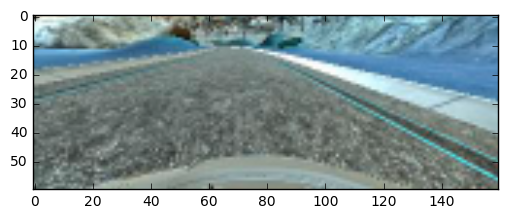

In [9]:
import numpy as np
import os
import pickle
import cv2
import csv
import matplotlib.pyplot as plt
import pandas as pd

#data_path="/MyFiles/sc15770/drive_simulator/"
data_path="/users/sc15770/Desktop/MyFiles/sc15770/drive_simulator/"
pickle_path=os.getcwd()+"/data/"

img_path=data_path+"IMG/"

img_height=80
img_width=160
nb_color_chnls=3
crop=20
# resize image and normalize 
def process_image(img):
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(img_width,img_height),interpolation=cv2.INTER_AREA)  
    img=img[crop:,:,:]
    img=(img/255.0)-0.5
    
    return img
##############################################################


nb_frames=(len(pd.read_csv(data_path+'driving_log.csv')))
ctr_frames=np.empty((nb_frames,img_height-crop,img_width,nb_color_chnls),np.float32)
steerings=np.empty((nb_frames),np.float32)

with open(data_path+'driving_log.csv','rt') as csvfile:
    readf=csv.reader(csvfile)    
    readf.next()
    for i, row in enumerate(readf):
        [ctr_fname, left_fname, right_fname, steering, throttle, brake, speed]=row
        # process center image
        temp=ctr_fname.split('\\')
        img=cv2.imread(img_path+temp[-1])
        ctr_frames[i]=process_image(img)
        steerings[i]=steering

img=(ctr_frames[0]+0.5)*255
plt.imshow(img.astype(np.uint8))
plt.show()    
train={}
train['ctr_frames']=ctr_frames
train['steerings']=steerings
# Dump into pick files
with open(pickle_path+'/train.p', 'wb') as f:
    pickle.dump(train, f, protocol=2)
    

In [10]:
with open(pickle_path+'/train.p', mode='rb') as f:
    train = pickle.load(f)

X_train, y_train=train['ctr_frames'], train['steerings']

In [11]:
print pickle_path
print X_train.shape

/space/sc15770/Code/self_driving/behavioral-cloning/data/
(189, 60, 160, 3)


In [81]:
print y_train.shape

(189,)
